In [37]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split



iris = datasets.load_iris()

X = iris.data[:, :2]

y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [38]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

#Trying scaling
svm_clf = Pipeline((("scaler", StandardScaler()), ("svc", SVC(C=1,kernel='poly',degree=3))))

svm_clf.fit(X_train, y_train)

svm_clf.score(X_test, y_test)

0.7

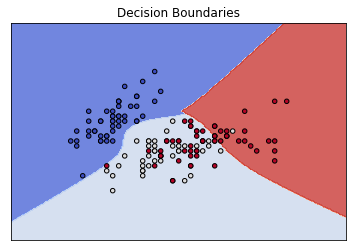

In [41]:
f, ax = plt.subplots()

title = ('Decision Boundaries')

# Set up grid.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

#Clear clutter and display plot.
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

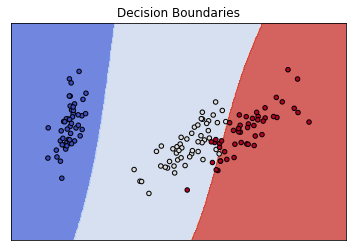

In [42]:
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data  
y = iris.target

pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)

model = svm.SVC(kernel='poly',C=1,degree=3)
clf = model.fit(X_PCA, y)

f, ax = plt.subplots()
title = ('Decision Boundaries')
X0 = X_PCA[:, 0]
X1 = X_PCA[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [43]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

lda = LinearDiscriminantAnalysis()

lda.fit(X_train,y_train)
lda.score(X_test,y_test)

0.95

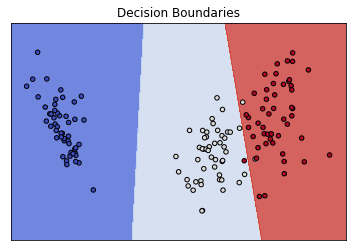

In [44]:
#Graphing LDA Experiment - used multiple to make things work nicely.
lda2 = LinearDiscriminantAnalysis()
X_lda = lda2.fit_transform(X,y)

lda3 = LinearDiscriminantAnalysis()
lda3.fit(X_lda,y)

f, ax = plt.subplots()
title = ('Decision Boundaries')
X0 = X_lda[:, 0]
X1 = X_lda[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lda3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [45]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

digits = datasets.load_digits()

X = digits.data  
y = digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

svm_clf = Pipeline((("scaler", StandardScaler()), ("svc", SVC(C=1,kernel='poly',degree=3))))

svm_clf.fit(X_train, y_train)

svm_clf.score(X_test, y_test)


parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.2, 0.5, 1, 2, 4, 6, 8, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, y)
print(clf.best_params_)

{'C': 8, 'kernel': 'rbf'}


In [46]:
svm_clf = SVC(C=8,kernel='rbf')
svm_clf.fit(X_train, y_train)

svm_clf.score(X_test, y_test)

0.9902642559109874